In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from matplotlib.ticker import FuncFormatter
import numpy as np

In [87]:
#os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_FOOD_rebal")
#os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_USER_norebal")
#os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_MIXED_rebal")

os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/SS_MIXED")

In [88]:
extension = 'csv'

#User trips
user_filenames =[i for i in glob.glob('people_trips_*.{}'.format(extension))]

#Food rips
food_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]


In [89]:
numitems_people = len(user_filenames)
print(numitems_people)

numitems_food = len(food_filenames)
print(numitems_food)

38
38


In [90]:
df_total_user = []

for f in user_filenames:
 temp_f = pd.read_csv(f)
 print(len(temp_f))
 df_total_user.append(temp_f)

12867
12868
12866
12867
12868
19157
12864
12865
12865
12866
12868
12866
19156
19155
12865
19157
19156
12865
12866
12863
19156
19156
19156
19155
19155
19156
12863
12865
12866
19155
19156
19157
19155
19156
19156
19157
19157
12863


In [91]:
df_total_food = []

for f in food_filenames:
 temp_f = pd.read_csv(f)
 print(len(temp_f))
 df_total_food.append(temp_f)

2894
6498
6498
6498
2894
6496
2892
6497
2893
2893
6498
6495
6496
2894
2894
2894
2894
2894
6495
2894
2893
6496
2893
2894
6498
6498
6497
6496
6497
2892
2894
2893
6497
6496
2894
2893
6498
6497


In [92]:

counts_nbikes_all_food = []

for sim_user in df_total_food:
    #sim_user['Day'] = sim_user['Day'] - 6
    sim_user['start_time_ed'] = pd.to_datetime(sim_user['Time']).dt.floor('15Min')
    counts_nbikes = sim_user.groupby(['Day', 'start_time_ed'])['NumBikes'].max().reset_index()
    counts_nbikes_all_food.append(counts_nbikes)

In [93]:

counts_nbikes_all = []

for sim_user in df_total_user:
    #sim_user['Day'] = sim_user['Day'] - 6
    sim_user['start_time_ed'] = pd.to_datetime(sim_user['Time']).dt.floor('15Min')
    counts_nbikes = sim_user.groupby(['Day', 'start_time_ed'])['NumBikes'].max().reset_index()
    counts_nbikes_all.append(counts_nbikes)


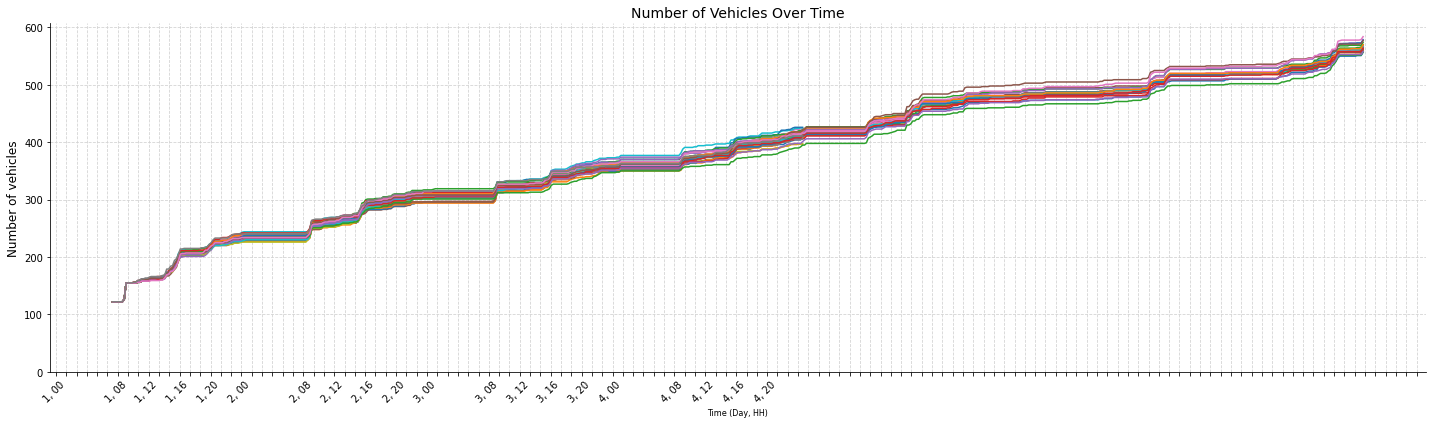

In [94]:
# Continue with your plotting code
fig, ax = plt.subplots(figsize=(20, 6))

# Plot each DataFrame as a separate line
for i, df in enumerate(counts_nbikes_all[:38]):
    total_minutes = (df['Day'] * 24 * 60) + (df['start_time_ed'].dt.hour * 60) + df['start_time_ed'].dt.minute
    ax.plot(total_minutes, df['NumBikes'], label=f'DataFrame {i+1}')

# Customize x-axis tick labels
days = df['Day'].unique()
hours = df['start_time_ed'].dt.hour.unique()
xtick_positions = [(day * 24 * 60) + (hour * 60) for day in days for hour in hours]
xtick_labels = [f'{day}, {hour:02d}' for day in days for hour in hours]

ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels)

plt.xlabel('Time (Day, HH)', fontsize=8)
plt.ylabel('Number of vehicles', fontsize=12)
plt.title('Number of Vehicles Over Time', fontsize=14)

plt.grid(color='lightgray', linestyle='--')
plt.ylim(0)

plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=45, ha='right')

plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True, prune='both', nbins=168))

#plt.legend(loc='best')  # Show the legend

plt.tight_layout()
plt.show()

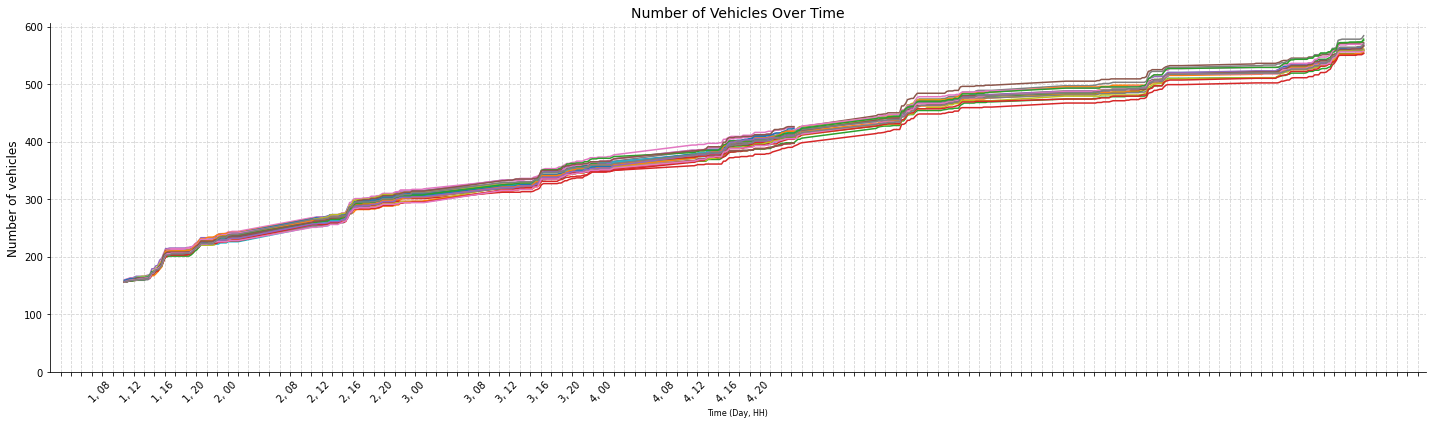

In [95]:
# Continue with your plotting code
fig, ax = plt.subplots(figsize=(20, 6))

# Plot each DataFrame as a separate line
for i, df in enumerate(counts_nbikes_all_food[:38]):
    total_minutes = (df['Day'] * 24 * 60) + (df['start_time_ed'].dt.hour * 60) + df['start_time_ed'].dt.minute
    ax.plot(total_minutes, df['NumBikes'], label=f'DataFrame {i+1}')

# Customize x-axis tick labels
days = df['Day'].unique()
hours = df['start_time_ed'].dt.hour.unique()
#xtick_positions = [(day * 24 * 60) + (hour * 60) for day in days for hour in hours]
#xtick_labels = [f'{day}, {hour:02d}' for day in days for hour in hours]

ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels)

plt.xlabel('Time (Day, HH)', fontsize=8)
plt.ylabel('Number of vehicles', fontsize=12)
plt.title('Number of Vehicles Over Time', fontsize=14)

plt.grid(color='lightgray', linestyle='--')
plt.ylim(0)

plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=45, ha='right')

plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True, prune='both', nbins=168))

#plt.legend(loc='best')  # Show the legend

plt.tight_layout()
plt.show()

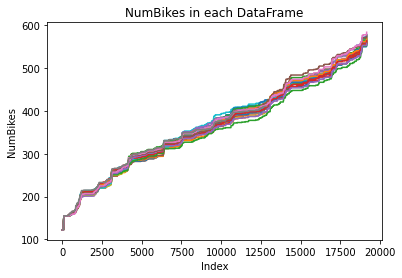

In [96]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Iterate through each DataFrame in df_total
for i, df in enumerate(df_total_user):
    # Assuming the column name is 'NumBikes'
    ax.plot(df['NumBikes'], label=f'DF {i+1}')

# Add labels and title to the plot
ax.set_xlabel('Index')
ax.set_ylabel('NumBikes')
ax.set_title('NumBikes in each DataFrame')

# Add a legend to identify each DataFrame's plot
#ax.legend()

# Show the plot
plt.show()

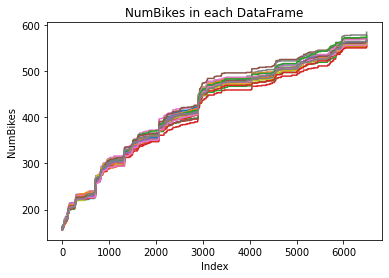

In [97]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Iterate through each DataFrame in df_total
for i, df in enumerate(df_total_food):
    # Assuming the column name is 'NumBikes'
    ax.plot(df['NumBikes'], label=f'DF {i+1}')

# Add labels and title to the plot
ax.set_xlabel('Index')
ax.set_ylabel('NumBikes')
ax.set_title('NumBikes in each DataFrame')

# Add a legend to identify each DataFrame's plot
#ax.legend()

# Show the plot
plt.show()

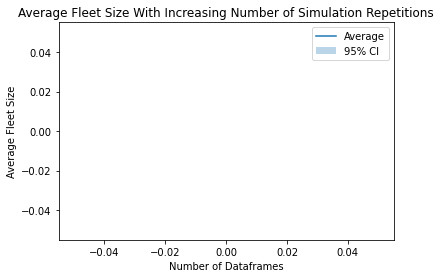

In [98]:
# Step 1: Create empty lists to store the maximum values, average values, and confidence intervals
max_values_day_7 = []
avg_values = []
ci_lower_values = []
ci_upper_values = []
ci_delta_values = []

# Step 2: Loop over the dataframes and calculate the maximum value for "day 13"
for i, df in enumerate(df_total_user):
    max_value_day_7 = df.loc[df['Day'] == 7, 'NumBikes'].max()
    max_values_day_7.append(max_value_day_7)
    
    # Calculate the average and confidence intervals with an increasing number of dataframes
    x_values = range(i + 1)
    avg_value = np.mean(max_values_day_7[:i + 1])
    std_value = np.std(max_values_day_7[:i + 1])
    ci_lower = avg_value - 1.96 * std_value / np.sqrt(i + 1)
    ci_upper = avg_value + 1.96 * std_value / np.sqrt(i + 1)
    ci_delta = ci_upper - ci_lower
    
    # Append the average, confidence interval, and delta values to their respective lists
    avg_values.append(avg_value)
    ci_lower_values.append(ci_lower)
    ci_upper_values.append(ci_upper)
    ci_delta_values.append(ci_delta)

# Step 3: Create the x-axis values
x_values = range(1, len(df_total_user) + 1)

# Step 4: Create the plot
plt.plot(x_values, avg_values, label='Average')
plt.fill_between(x_values, ci_lower_values, ci_upper_values, alpha=0.3, label='95% CI')
plt.xlabel('Number of Dataframes')
plt.ylabel('Average Fleet Size')
plt.title('Average Fleet Size With Increasing Number of Simulation Repetitions')
plt.legend()
plt.show()

# Step 5: Create a DataFrame with the data
data = {
    'Number of Dataframes': x_values,
    'Average': avg_values,
    'CI Lower': ci_lower_values,
    'CI Upper': ci_upper_values,
    'CI Delta': ci_delta_values
}
df_table_user = pd.DataFrame(data)



# Step 6: Save the DataFrame to a CSV file
#df_table.to_csv('average_ci_data.csv', index=False)


In [99]:
print(df_table_user)


    Number of Dataframes  Average  CI Lower  CI Upper  CI Delta
0                      1      NaN       NaN       NaN       NaN
1                      2      NaN       NaN       NaN       NaN
2                      3      NaN       NaN       NaN       NaN
3                      4      NaN       NaN       NaN       NaN
4                      5      NaN       NaN       NaN       NaN
5                      6      NaN       NaN       NaN       NaN
6                      7      NaN       NaN       NaN       NaN
7                      8      NaN       NaN       NaN       NaN
8                      9      NaN       NaN       NaN       NaN
9                     10      NaN       NaN       NaN       NaN
10                    11      NaN       NaN       NaN       NaN
11                    12      NaN       NaN       NaN       NaN
12                    13      NaN       NaN       NaN       NaN
13                    14      NaN       NaN       NaN       NaN
14                    15      NaN       

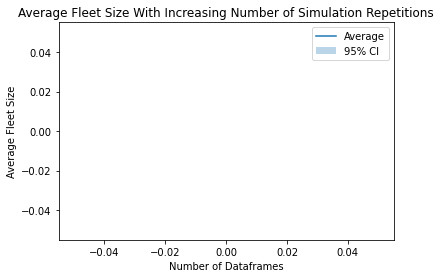

In [100]:
# Step 1: Create empty lists to store the maximum values, average values, and confidence intervals
max_values_day_7 = []
avg_values = []
ci_lower_values = []
ci_upper_values = []
ci_delta_values = []

# Step 2: Loop over the dataframes and calculate the maximum value for "day 13"
for i, df in enumerate(df_total_food):
    max_value_day_7 = df.loc[df['Day'] == 7, 'NumBikes'].max()
    max_values_day_7.append(max_value_day_7)
    
    # Calculate the average and confidence intervals with an increasing number of dataframes
    x_values = range(i + 1)
    avg_value = np.mean(max_values_day_7[:i + 1])
    std_value = np.std(max_values_day_7[:i + 1])
    ci_lower = avg_value - 1.96 * std_value / np.sqrt(i + 1)
    ci_upper = avg_value + 1.96 * std_value / np.sqrt(i + 1)
    ci_delta = ci_upper - ci_lower
    
    # Append the average, confidence interval, and delta values to their respective lists
    avg_values.append(avg_value)
    ci_lower_values.append(ci_lower)
    ci_upper_values.append(ci_upper)
    ci_delta_values.append(ci_delta)

# Step 3: Create the x-axis values
x_values = range(1, len(df_total_food) + 1)

# Step 4: Create the plot
plt.plot(x_values, avg_values, label='Average')
plt.fill_between(x_values, ci_lower_values, ci_upper_values, alpha=0.3, label='95% CI')
plt.xlabel('Number of Dataframes')
plt.ylabel('Average Fleet Size')
plt.title('Average Fleet Size With Increasing Number of Simulation Repetitions')
plt.legend()
plt.show()

# Step 5: Create a DataFrame with the data
data = {
    'Number of Dataframes': x_values,
    'Average': avg_values,
    'CI Lower': ci_lower_values,
    'CI Upper': ci_upper_values,
    'CI Delta': ci_delta_values
}
df_table_food = pd.DataFrame(data)



# Step 6: Save the DataFrame to a CSV file
#df_table.to_csv('average_ci_data.csv', index=False)


In [101]:
print(df_table_food)

    Number of Dataframes  Average  CI Lower  CI Upper  CI Delta
0                      1      NaN       NaN       NaN       NaN
1                      2      NaN       NaN       NaN       NaN
2                      3      NaN       NaN       NaN       NaN
3                      4      NaN       NaN       NaN       NaN
4                      5      NaN       NaN       NaN       NaN
5                      6      NaN       NaN       NaN       NaN
6                      7      NaN       NaN       NaN       NaN
7                      8      NaN       NaN       NaN       NaN
8                      9      NaN       NaN       NaN       NaN
9                     10      NaN       NaN       NaN       NaN
10                    11      NaN       NaN       NaN       NaN
11                    12      NaN       NaN       NaN       NaN
12                    13      NaN       NaN       NaN       NaN
13                    14      NaN       NaN       NaN       NaN
14                    15      NaN       

nan nan nan
566 nan 566
578 nan 578
554 nan 554
nan nan nan
572 560 572
nan nan nan
584 nan 584
nan nan nan
nan nan nan
566 nan 566
559 nan 559
558 574 574
nan 565 nan
nan nan nan
nan 567 nan
nan 568 nan
nan nan nan
561 nan 561
nan nan nan
nan 557 nan
556 562 562
nan 570 nan
nan 563 nan
568 579 579
567 562 567
570 nan 570
560 nan 560
559 nan 559
nan 566 nan
nan 578 nan
nan 570 nan
576 557 576
553 564 564
nan 558 nan
nan 577 nan
557 584 584
570 nan 570


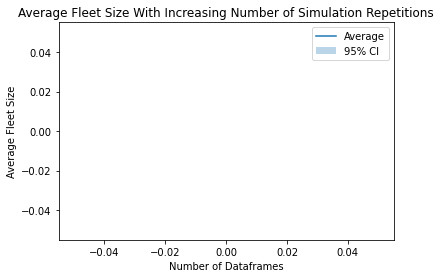

In [102]:
###In the mixed scenario, we need to combine the metrics

# Step 1: Create empty lists to store the maximum values, average values, and confidence intervals
max_values_day_7 = []
avg_values = []
ci_lower_values = []
ci_upper_values = []
ci_delta_values = []

# Step 2: Loop over the dataframes and calculate the maximum value for "day 13"
for i in range(max(numitems_people,numitems_food)):
    #Get that sim number from Users and Food
    df_f=df_total_food[i]
    df_u= df_total_user[i]

    #Find the max value 
    max_value_day_7_f = df_f.loc[df_f['Day'] == 7, 'NumBikes'].max()
    max_value_day_7_u = df_u.loc[df_u['Day'] == 7, 'NumBikes'].max()
    max_value_day_7 = max(max_value_day_7_f, max_value_day_7_u)
    max_values_day_7.append(max_value_day_7)
    
    print(max_value_day_7_f, max_value_day_7_u, max_value_day_7)
    # Calculate the average and confidence intervals with an increasing number of dataframes
    x_values = range(i + 1)
    avg_value = np.mean(max_values_day_7[:i + 1])
    std_value = np.std(max_values_day_7[:i + 1])
    ci_lower = avg_value - 1.96 * std_value / np.sqrt(i + 1)
    ci_upper = avg_value + 1.96 * std_value / np.sqrt(i + 1)
    ci_delta = ci_upper - ci_lower
    
    # Append the average, confidence interval, and delta values to their respective lists
    avg_values.append(avg_value)
    ci_lower_values.append(ci_lower)
    ci_upper_values.append(ci_upper)
    ci_delta_values.append(ci_delta)

# Step 3: Create the x-axis values
x_values = range(1, len(df_total_food) + 1)

# Step 4: Create the plot
plt.plot(x_values, avg_values, label='Average')
plt.fill_between(x_values, ci_lower_values, ci_upper_values, alpha=0.3, label='95% CI')
plt.xlabel('Number of Dataframes')
plt.ylabel('Average Fleet Size')
plt.title('Average Fleet Size With Increasing Number of Simulation Repetitions')
plt.legend()
plt.show()

# Step 5: Create a DataFrame with the data
data = {
    'Number of Dataframes': x_values,
    'Average': avg_values,
    'CI Lower': ci_lower_values,
    'CI Upper': ci_upper_values,
    'CI Delta': ci_delta_values
}
df_table_mixed = pd.DataFrame(data)